In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('happiness_data.csv')

# Summarize data
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

# Identify continuous and categorical columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nContinuous columns:")
print(continuous_cols)
print("\nCategorical columns:")
print(categorical_cols)

Number of rows: 1949
Number of columns: 11

Continuous columns:
Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

Categorical columns:
Index(['Country name'], dtype='object')


              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.25800

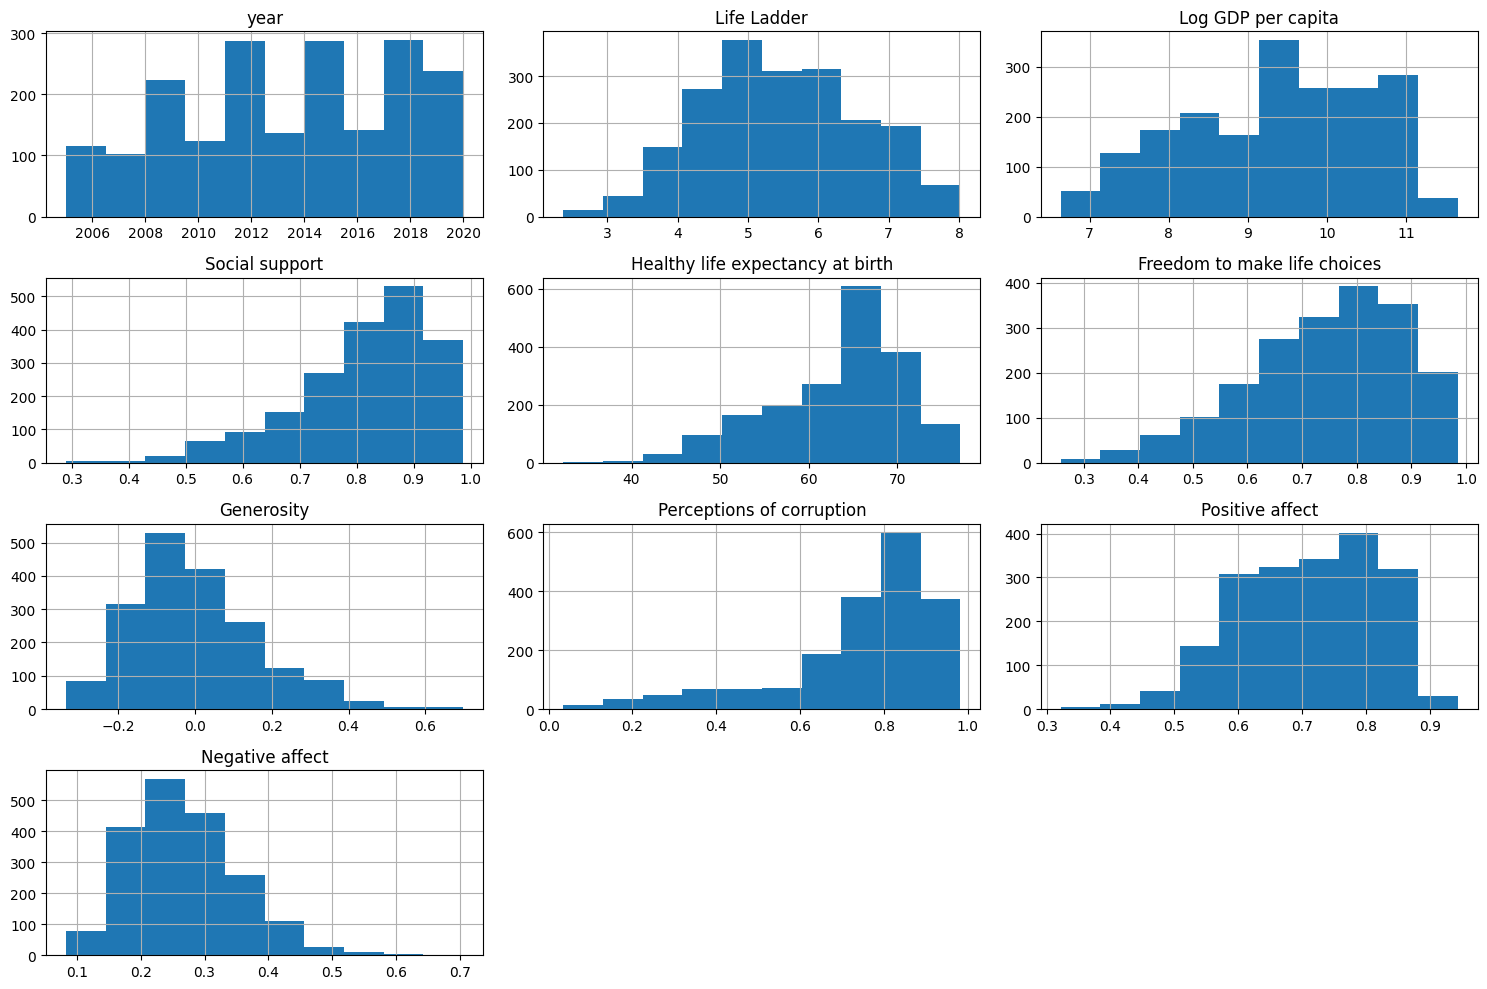


Skewness:
year                               -0.128238
Life Ladder                         0.068483
Log GDP per capita                 -0.308453
Social support                     -1.110682
Healthy life expectancy at birth   -0.744426
Freedom to make life choices       -0.623019
Generosity                          0.807140
Perceptions of corruption          -1.496045
Positive affect                    -0.364197
Negative affect                     0.737166
dtype: float64

Number of outliers:
year: 0
Life Ladder: 0
Log GDP per capita: 0
Social support: 43
Healthy life expectancy at birth: 15
Freedom to make life choices: 10
Generosity: 36
Perceptions of corruption: 164
Positive affect: 3
Negative affect: 29


In [3]:
# Display summary statistics
print(df.describe())

# Plot histograms
df[continuous_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

# Check for skewness
skewness = df[continuous_cols].skew()
print("\nSkewness:")
print(skewness)

# Check for outliers
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

print("\nNumber of outliers:")
for col in continuous_cols:
    print(f"{col}: {detect_outliers(df, col)}")

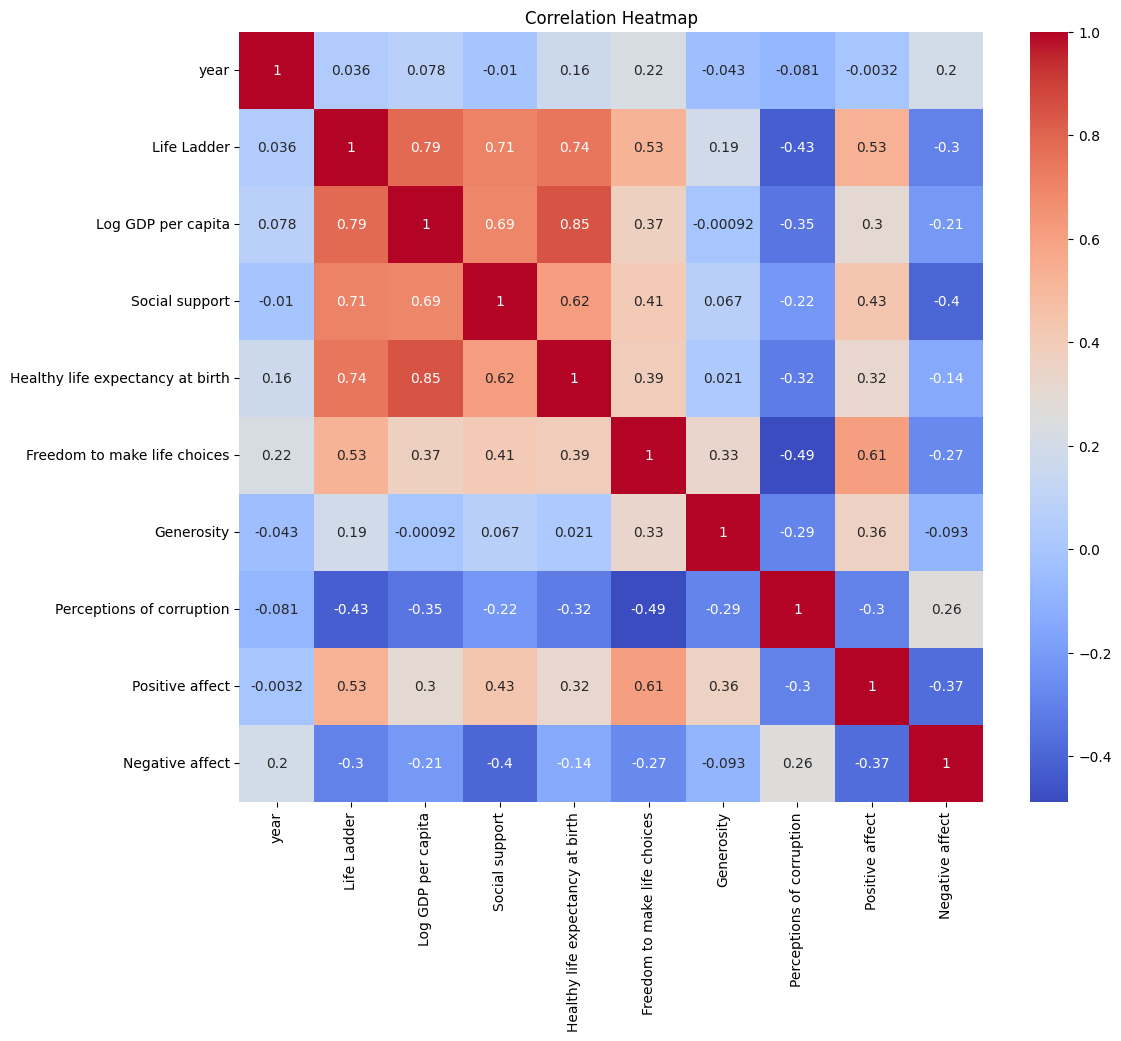

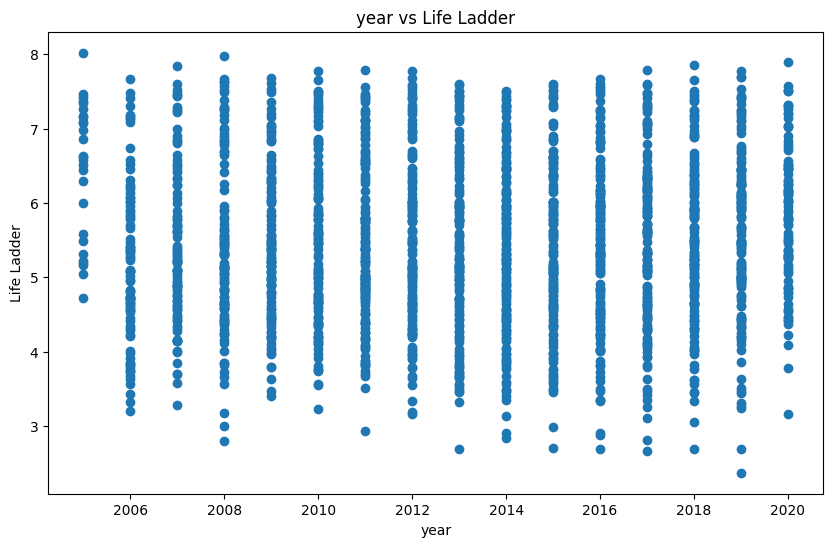

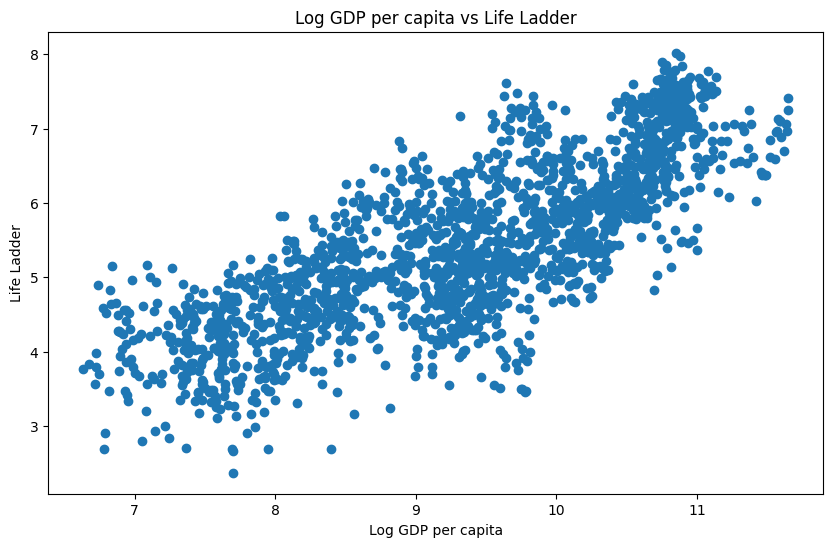

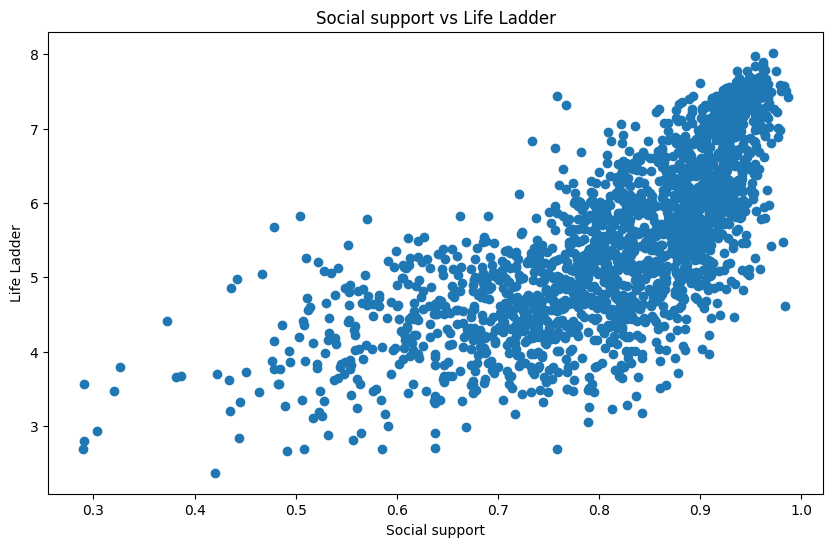

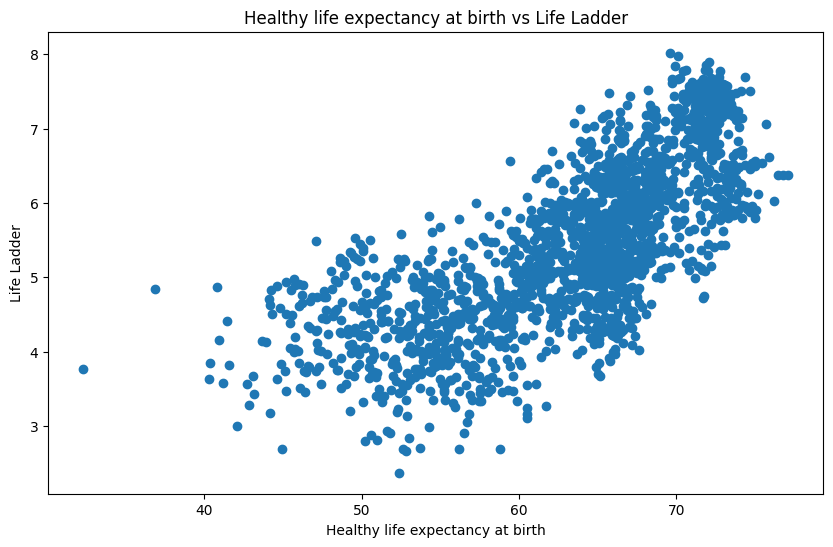

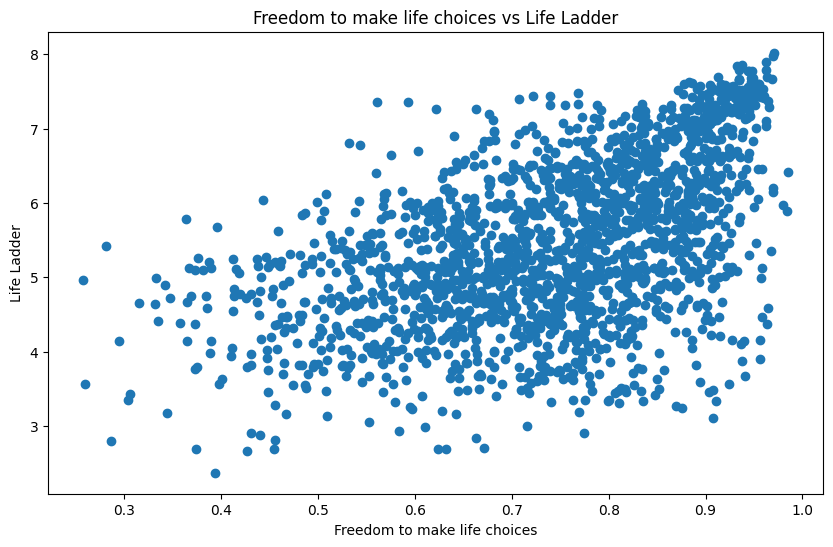

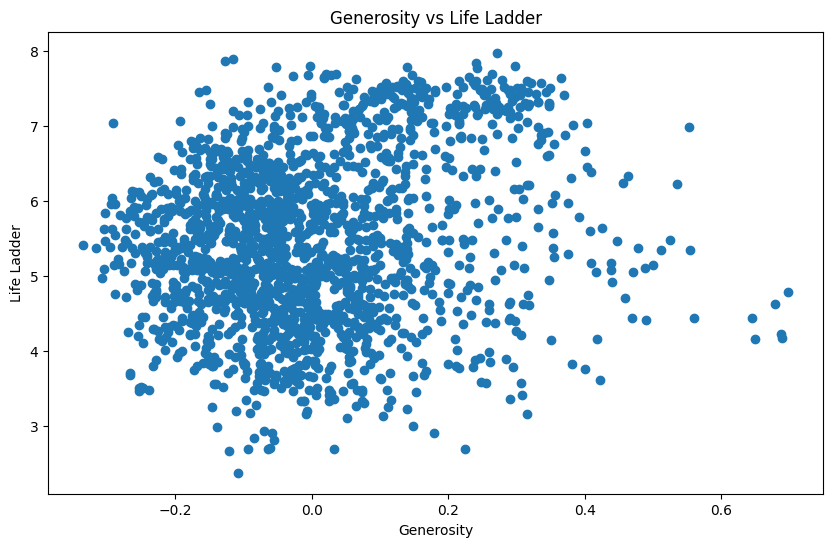

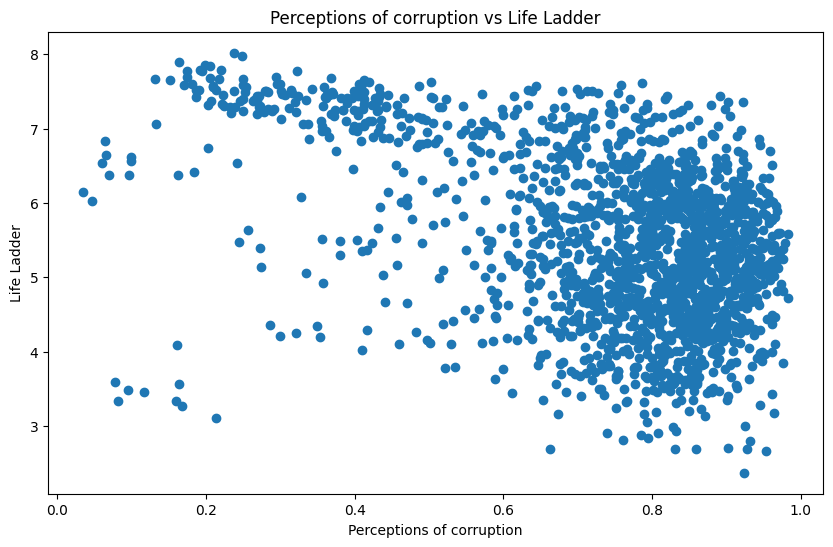

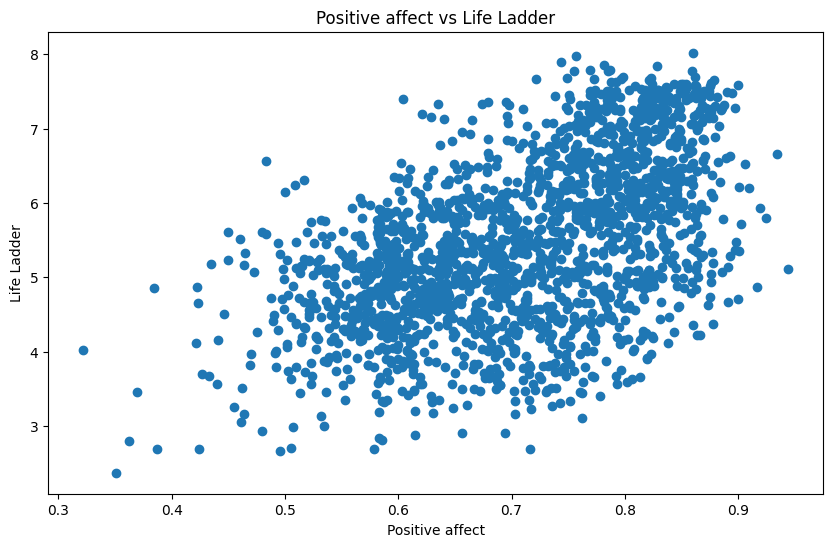

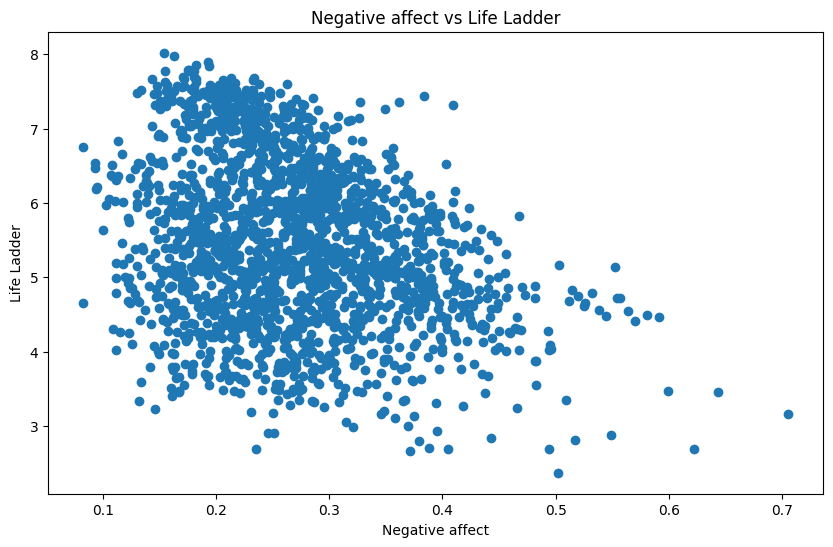

In [7]:
# Compute correlation matrix
corr = df[continuous_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Generate scatter plots
for col in continuous_cols:
    if col != 'Life Ladder':
        plt.figure(figsize=(10,6))
        plt.scatter(df[col], df['Life Ladder'])
        plt.xlabel(col)
        plt.ylabel('Life Ladder')
        plt.title(f'{col} vs Life Ladder')
        plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split data
X = df.drop(['Life Ladder', 'year'], axis=1)
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify representativeness
print("Full dataset mean:", y.mean())
print("Test set mean:", y_test.mean())

print("\nFull dataset std:", y.std())
print("Test set std:", y_test.std())

Full dataset mean: 5.46670548999487
Test set mean: 5.494120901639345

Full dataset std: 1.1157105016473905
Test set std: 1.111866357275493


Closed-form MSE: 0.3026932721837239
SGD MSE: 0.30272339859534414
Alpha 0.1 - Ridge MSE: 0.3027, Lasso MSE: 0.3241, Elastic Net MSE: 0.3102
Alpha 1 - Ridge MSE: 0.3027, Lasso MSE: 1.2503, Elastic Net MSE: 0.7807
Alpha 10 - Ridge MSE: 0.3026, Lasso MSE: 1.2503, Elastic Net MSE: 1.2503


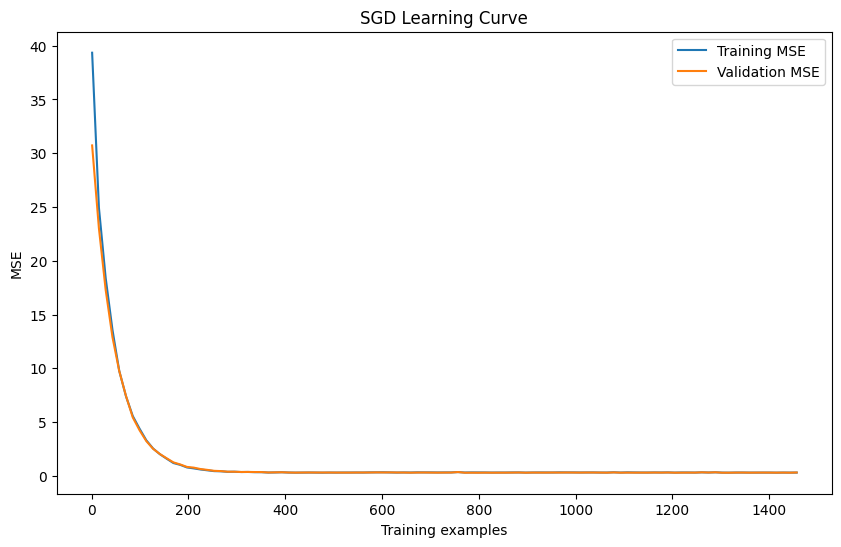

Learning rate: 0.01, MSE: 0.3107
Learning rate: 0.001, MSE: 0.3025
Learning rate: 0.0001, MSE: 0.3062


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df.drop(['Life Ladder', 'year', 'Country name'], axis=1)
y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline for preprocessing and modeling
def create_pipeline(model):
    return make_pipeline(
        SimpleImputer(strategy='mean'),
        StandardScaler(),
        model
    )

# Closed-form solution
lr_pipeline = create_pipeline(LinearRegression())
lr_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Closed-form MSE:", -lr_scores.mean())

# SGD
sgd_pipeline = create_pipeline(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
sgd_scores = cross_val_score(sgd_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("SGD MSE:", -sgd_scores.mean())

# Regularization
alphas = [0.1, 1, 10]
for alpha in alphas:
    ridge_pipeline = create_pipeline(Ridge(alpha=alpha))
    lasso_pipeline = create_pipeline(Lasso(alpha=alpha))
    elastic_pipeline = create_pipeline(ElasticNet(alpha=alpha, l1_ratio=0.5))

    ridge_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    lasso_scores = cross_val_score(lasso_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    elastic_scores = cross_val_score(elastic_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

    print(f"Alpha {alpha} - Ridge MSE: {-ridge_scores.mean():.4f}, Lasso MSE: {-lasso_scores.mean():.4f}, Elastic Net MSE: {-elastic_scores.mean():.4f}")

# SGD learning curve
sgd_pipeline = create_pipeline(SGDRegressor(max_iter=1, tol=1e-3, random_state=42, learning_rate='constant', eta0=0.01))
sgd_pipeline.fit(X_train, y_train)  # Fit once to initialize

train_scores, valid_scores = [], []
train_sizes = range(1, len(X_train), len(X_train) // 100)  # 100 points on the curve

for size in train_sizes:
    sgd_pipeline.fit(X_train[:size], y_train[:size])
    train_scores.append(mean_squared_error(y_train[:size], sgd_pipeline.predict(X_train[:size])))
    valid_scores.append(mean_squared_error(y_test, sgd_pipeline.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores, label='Training MSE')
plt.plot(train_sizes, valid_scores, label='Validation MSE')
plt.legend()
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('SGD Learning Curve')
plt.show()

# Learning rate impact (removed batch_size)
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    sgd_pipeline = create_pipeline(SGDRegressor(max_iter=1000, tol=1e-3, random_state=42,
                                                learning_rate='constant', eta0=lr))
    scores = cross_val_score(sgd_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    print(f"Learning rate: {lr}, MSE: {-scores.mean():.4f}")

Polynomial degree 1 - Cross-validation MSE: 0.3107


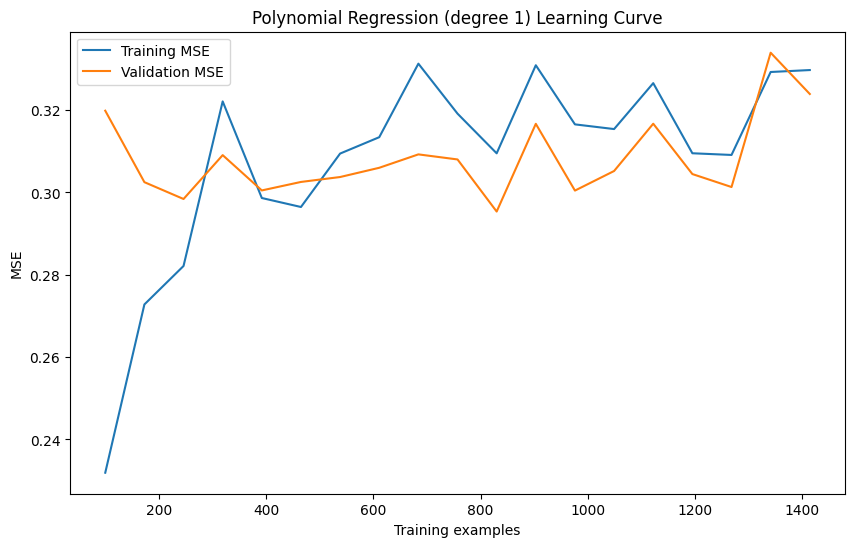

Polynomial degree 2 - Cross-validation MSE: 0.3964


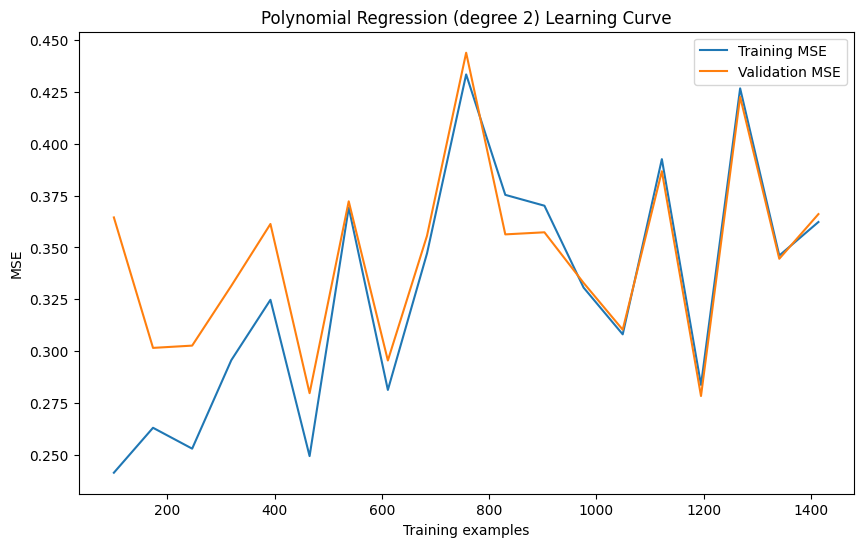

Polynomial degree 3 - Cross-validation MSE: 558030677768405562425344.0000


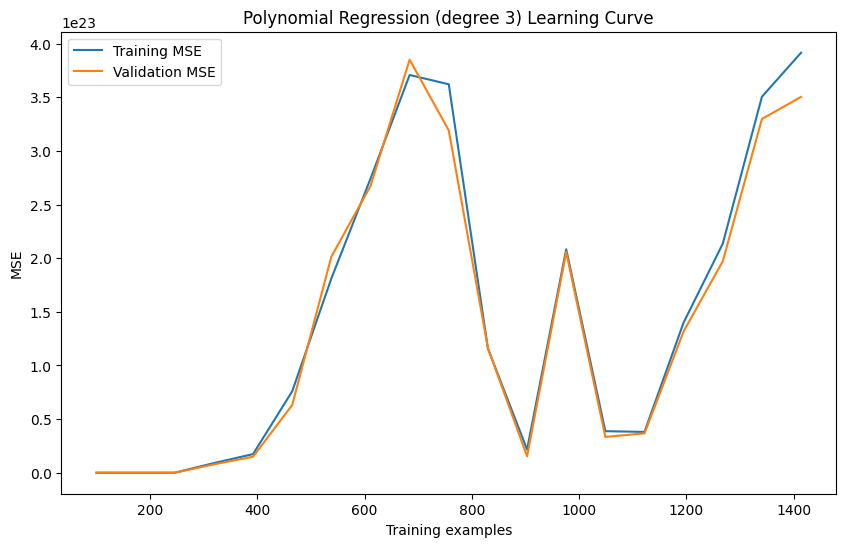

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train, X_test, y_train, y_test are already defined from the previous question

# 6. Polynomial Regression with SGD

def create_poly_pipeline(degree, sgd_params):
    return make_pipeline(
        SimpleImputer(strategy='mean'),
        PolynomialFeatures(degree=degree),
        StandardScaler(),
        SGDRegressor(**sgd_params)
    )

degrees = [1, 2, 3]
sgd_params = {'max_iter': 1000, 'tol': 1e-3, 'random_state': 42, 'learning_rate': 'constant', 'eta0': 0.01}

for degree in degrees:
    poly_pipeline = create_poly_pipeline(degree, sgd_params)

    # Cross-validation
    cv_scores = cross_val_score(poly_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    print(f"Polynomial degree {degree} - Cross-validation MSE: {-cv_scores.mean():.4f}")

    # Learning curve
    poly_pipeline.fit(X_train, y_train)
    train_sizes = range(100, len(X_train), len(X_train) // 20)
    train_scores, valid_scores = [], []

    for size in train_sizes:
        poly_pipeline.fit(X_train[:size], y_train[:size])
        train_scores.append(mean_squared_error(y_train[:size], poly_pipeline.predict(X_train[:size])))
        valid_scores.append(mean_squared_error(y_test, poly_pipeline.predict(X_test)))

    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_scores, label='Training MSE')
    plt.plot(train_sizes, valid_scores, label='Validation MSE')
    plt.legend()
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.title(f'Polynomial Regression (degree {degree}) Learning Curve')
    plt.show()


Final Model Performance:
Mean Squared Error: 0.4112
R-squared Score: 0.6667


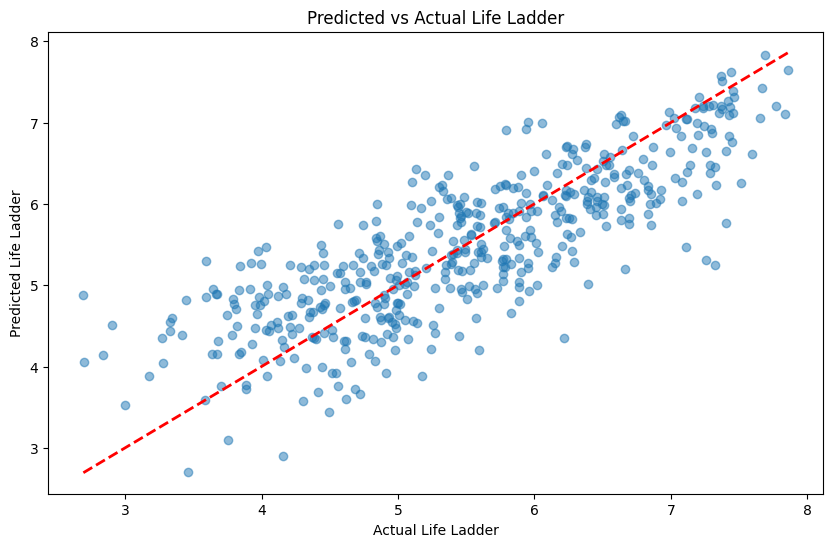

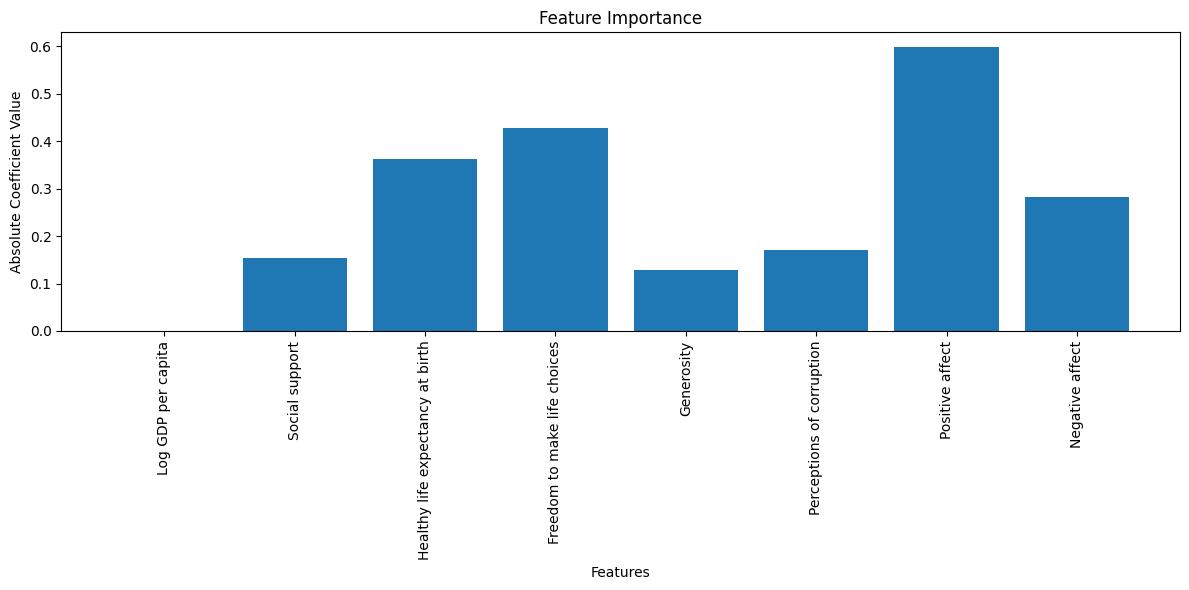

In [17]:
# Choose the best model (let's assume degree 2 performed best)
best_model = create_poly_pipeline(2, sgd_params)
best_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Predicted vs Actual Life Ladder')
plt.show()

# Feature importance (for linear terms only)
feature_importance = best_model.named_steps['sgdregressor'].coef_[:X_train.shape[1]]
feature_names = X_train.columns

plt.figure(figsize=(12,6))
plt.bar(feature_names, np.abs(feature_importance))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()